In [1]:
import numpy as np   
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler  # 
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE,ADASYN

In [6]:
df = pd.read_csv('US_Heart_Patients (2).csv')

In [7]:
df

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,Female,48.0,2.0,1.0,20.0,NaN,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,Female,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,Female,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,Male,40.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [8]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


In [10]:
df.shape

(4240, 16)

In [12]:
for column in df.columns:
    if df[column].dtype == 'object':
        
        print()
        print(df[column].value_counts())
        print()


Gender
Female    2414
Male      1818
Name: count, dtype: int64



In [19]:
list = ['education','cigsPerDay','currentSmoker']

In [36]:
for column in cat:
    if df[column].dtype != 'object':
        
        print()
        print(df[column].value_counts())
        print()


education
1.0    1717
2.0    1252
3.0     688
4.0     473
Name: count, dtype: int64


currentSmoker
0.0    2143
1.0    2094
Name: count, dtype: int64



KeyError: 'BP Meds'

In [44]:
cat=["education","currentSmoker","BPMeds","prevalentStroke","prevalentHyp","diabetes"]

In [45]:
cat

['education',
 'currentSmoker',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes']

In [23]:
num = []
for i in df.columns:
    if df[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)    

In [24]:
cat

['education',
 'currentSmoker',
 'BP Meds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'Gender']

In [25]:
num

['age',
 'education',
 'currentSmoker',
 'cigsPerDay',
 'BP Meds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'tot cholesterol',
 'Systolic BP',
 'Diastolic BP',
 'BMI',
 'heartRate',
 'glucose',
 'Heart-Att']

In [29]:
round(df.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.58,8.57,32.00,42.00,49.0,56.00,70.0
education,4130.0,1.98,1.02,1.00,1.00,2.0,3.00,4.0
currentSmoker,4237.0,0.49,0.50,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4209.0,9.00,11.92,0.00,0.00,0.0,20.00,70.0
BP Meds,4180.0,0.03,0.17,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4231.0,0.01,0.08,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4238.0,0.31,0.46,0.00,0.00,0.0,1.00,1.0
diabetes,4238.0,0.03,0.16,0.00,0.00,0.0,0.00,1.0
tot cholesterol,4180.0,236.68,44.62,107.00,206.00,234.0,263.00,696.0
Systolic BP,4236.0,132.36,22.04,83.50,117.00,128.0,144.00,295.0


In [34]:
round(df.isnull().sum() * 100/df.shape[0],2)

Gender             0.19
age                0.05
education          2.59
currentSmoker      0.07
cigsPerDay         0.73
BP Meds            1.42
prevalentStroke    0.21
prevalentHyp       0.05
diabetes           0.05
tot cholesterol    1.42
Systolic BP        0.09
Diastolic BP       0.12
BMI                0.57
heartRate          0.09
glucose            9.22
Heart-Att          0.00
dtype: float64

In [35]:
df.rename(columns = {"BP Meds": "BPMeds","tot cholesterol": "tot_cholesterol","Systolic BP":"Systolic_BP","Diastolic BP":"Diastolic_BP"},inplace=True)


## Null Value Treatment

In [49]:
df.isnull().sum()

Gender               0
age                  2
education            0
currentSmoker        0
cigsPerDay          31
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
tot_cholesterol     60
Systolic_BP          4
Diastolic_BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64

In [41]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode)

In [48]:
for column in cat:
    df[column] = df[column].fillna(df[column].mode)

In [52]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Gender
['Male', 'Female', <bound method Series.mode of 0         Male\n1...]
Categories (3, object): [<bound method Series.mode of 0         Male\n1..., 'Female', 'Male']
[2 1 0]


feature: education
[4.0, 2.0, 1.0, 3.0, <bound method Series.mode of 0       4.0\n1   ...]
Categories (5, object): [4.0, 2.0, 1.0, 3.0, <bound method Series.mode of 0       4.0\n1   ...]
[0 1 2 3 4]


feature: currentSmoker
[0.0, 1.0, <bound method Series.mode of 0       0.0\n1   ...]
Categories (3, object): [0.0, 1.0, <bound method Series.mode of 0       0.0\n1   ...]
[0 1 2]


feature: BPMeds
[0.0, 1.0, <bound method Series.mode of 0       0.0\n1   ...]
Categories (3, object): [0.0, 1.0, <bound method Series.mode of 0       0.0\n1   ...]
[0 1 2]


feature: prevalentStroke
[0.0, <bound method Series.mode of 0       0.0\n1   ..., 1.0]
Categories (3, object): [0.0, <bound method Series.mode of 0       0.0\n1   ..., 1.0]
[0 1 2]


feature: prevalentHyp
[0.0, 1.0, <bound method Series.mode of 0      

In [57]:
imputer = KNNImputer(n_neighbors=5)
df_imputed=imputer.fit_transform(df)
df = pd.DataFrame(data = df_imputed,columns=df.columns)

In [56]:
from sklearn.impute import KNNImputer

In [58]:
df.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
tot_cholesterol    0
Systolic_BP        0
Diastolic_BP       0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
dtype: int64

## Outlier Treatment

<AxesSubplot:>

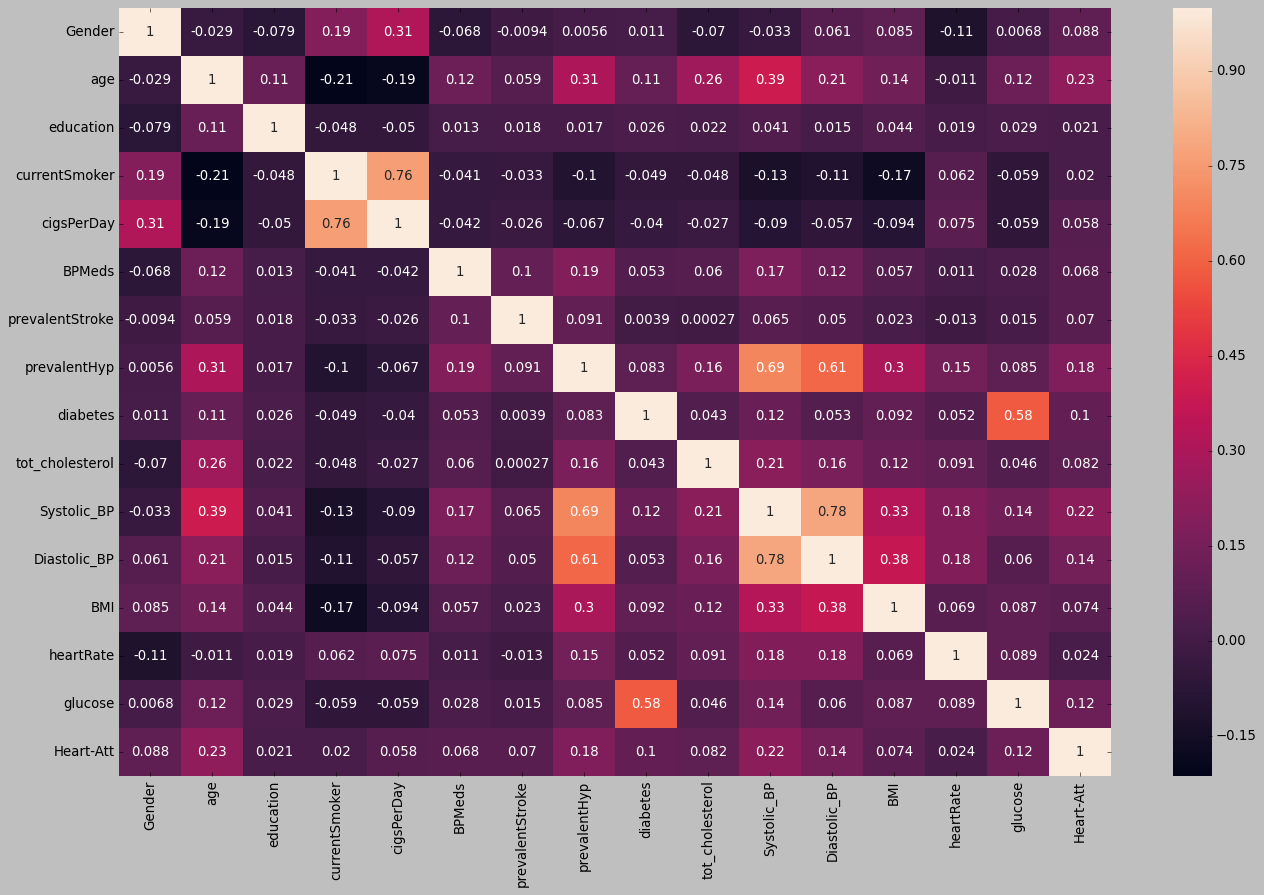

In [61]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)

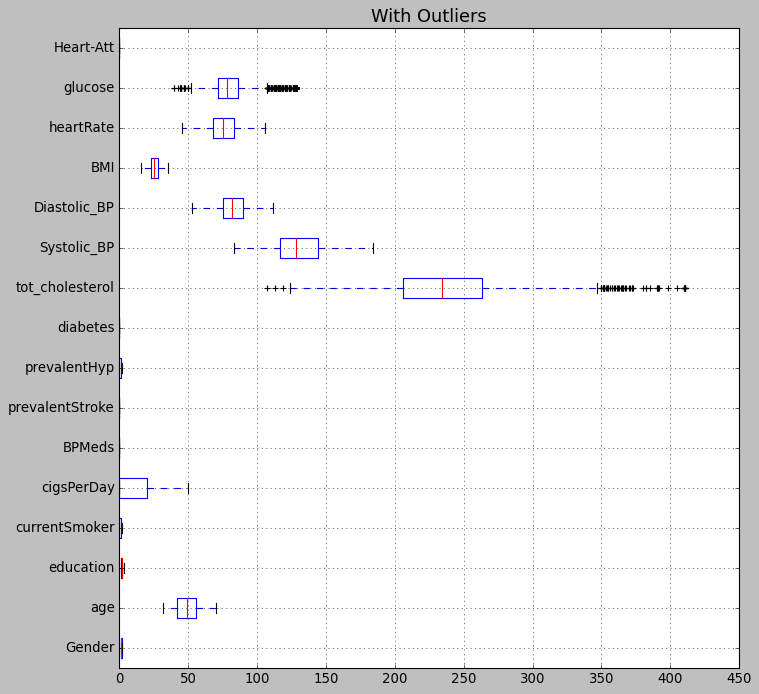

In [74]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [65]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [70]:
for column in df[cont].drop(['glucose','tot_cholesterol'],axis=1).columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

In [72]:
def remove_outlier2(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[15,85])
    IQR=Q3-Q1
    lower_range2= Q1-(1.5 * IQR)
    upper_range2= Q3+(1.5 * IQR)
    return lower_range2, upper_range2

In [73]:
for column in df[cont].columns:
    lr,ur=remove_outlier2(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])